In [0]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
# upload polution_dataSet.npy file
uploaded = files.upload()
# import data into a dataframe
import io
data = np.load(io.BytesIO(uploaded['polution_dataSet.npy']))

Saving polution_dataSet.npy to polution_dataSet (3).npy


In [0]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 1      # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 7000
VAL_SIZE = 1000
TEST_SIZE = 2000
TIMESTEPS = 24           # timesteps used for a single prediction (here each timestep is an hour)

In [0]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [0]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [0]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [0]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [0]:
from keras import backend
K.clear_session()
# keras modeling
model = Sequential()
model.add(GRU(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 40)                5880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 2/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 3/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 4/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 6/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 7/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/20
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 9/20
7000/7000 [==============================] - 7s 1ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/20
7000/7000 [===========

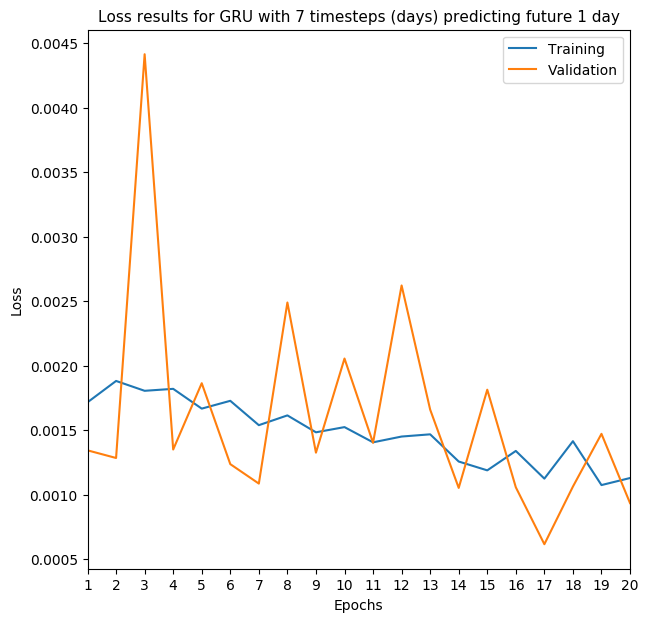

In [25]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['loss'], label='Training')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['val_loss'], label='Validation')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss results for GRU with 7 timesteps (days) predicting future 1 day', fontsize=11)
plt.legend()
plt.show()

In [26]:
print('train loss history:', history.history["loss"])
print('test loss history:', history.history["val_loss"])
scores = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result loss: %.3f' % (scores))

train loss history: [0.0017171740623390568, 0.001882517558115069, 0.0018061826724858423, 0.0018213586461414317, 0.0016680758021539077, 0.0017285830809019638, 0.0015397841305405434, 0.0016155587307210746, 0.0014844647107279992, 0.0015247611544951464, 0.0014068343975980368, 0.001451655468928428, 0.0014687874523224309, 0.0012579934073229586, 0.0011895457520482264, 0.0013400350549948468, 0.0011254732849192805, 0.0014155745562415437, 0.0010754784770376448, 0.0011301119336193162]
test loss history: [0.0013446564086189029, 0.0012854187599441501, 0.004415063039632514, 0.0013510159756697248, 0.0018651025059079984, 0.0012378493478172458, 0.0010869973371154629, 0.0024906874261796472, 0.001326695261814166, 0.0020562470713048242, 0.0014030703835305758, 0.0026227193110389636, 0.0016606320574646817, 0.0010534844713401981, 0.001814765818126034, 0.0010582805071317125, 0.0006170082274911692, 0.0010637624069931917, 0.0014726164762396366, 0.0009358143038116396]
2000/2000 [==============================] -

In [0]:
y_train = model.predict(x_train, batch_size=BATCH_SIZE)
y_val = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

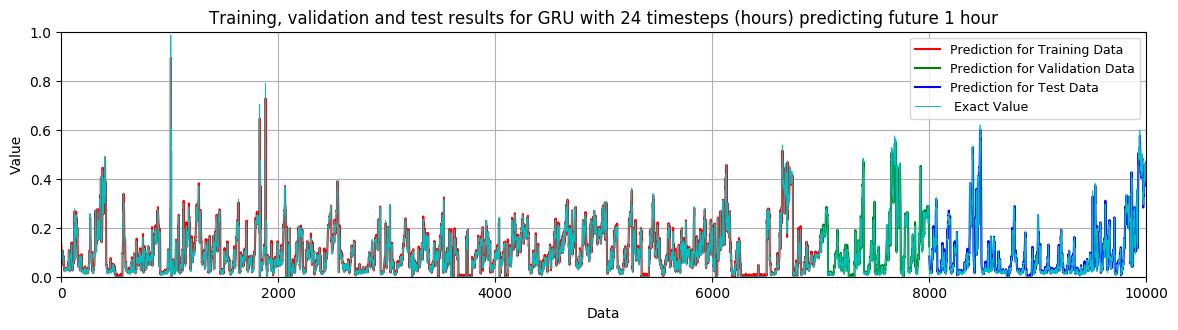

In [28]:
plt.figure(2, figsize=(14, 7), dpi=100)
plt.style.use(['default'])
plt.subplot(211)
plt.plot(range(0, TRAIN_SIZE), y_train, c='r', linewidth=1.5, label='Prediction for Training Data')
plt.plot(range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE), y_val, c='g', linewidth=1.5, label='Prediction for Validation Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, c='b', linewidth=1.5, label='Prediction for Test Data')
plt.plot(range(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total, c='c', linewidth=0.7, label=' Exact Value')
plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Training, validation and test results for GRU with 24 timesteps (hours) predicting future 1 hour')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()

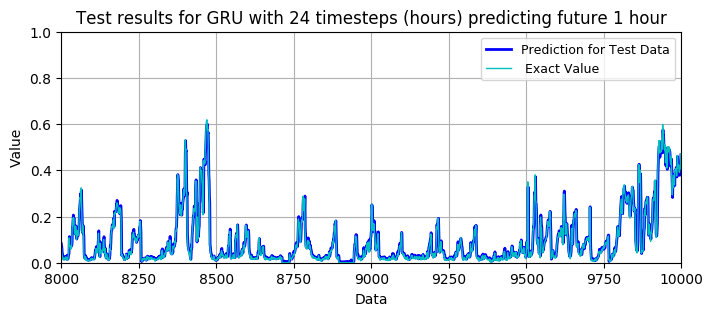

In [29]:
plt.figure(3, figsize=(8, 3), dpi=100)
plt.style.use(['default'])
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, 'b', linewidth=2, label='Prediction for Test Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total[TRAIN_SIZE+VAL_SIZE:TRAIN_SIZE+VAL_SIZE+TEST_SIZE], c='c', linewidth=1, label=' Exact Value')
plt.xlim(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Test results for GRU with 24 timesteps (hours) predicting future 1 hour')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.show()